# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [4]:
num_campaigns = 17

# Print the answer
print("The data represents", num_campaigns, "marketing campaigns.")

The data represents 17 marketing campaigns.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
import pandas as pd

# Load the dataset
file_path = "bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')  # Assuming CSV uses ';' as separator

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

# Check for 'unknown' values in categorical variables
print("\nCount of 'unknown' values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].isin(['unknown']).sum()}")

# Check unique values in each column to identify potential issues
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Display sample records to inspect formatting
print("\nSample Data:")
print(df.head())


Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The goal of this project is to develop and evaluate machine learning models that can predict whether a bank client will subscribe to a term deposit, using demographic, economic, and campaign-related data. This will support more efficient and targeted marketing efforts by enabling the bank to identify clients most likely to respond positively.

To achieve this, we will compare several machine learning algorithms—K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines—across multiple evaluation criteria:

1. Predictive Accuracy: How well does the model classify clients correctly?
2. Handling of Imbalanced Classes: Can the model perform well even when the number of 'yes' (success) outcomes is much smaller than 'no' or vice versa?
3. Training Time: How quickly can the model be trained on the dataset?
4. Interpretability: Can the results be easily understood and explained to stakeholders?

By weighing these factors, we aim to identify a model that balances predictive power, efficiency, and practical usability in a real-world banking environment.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [10]:
import pandas as pd

# Load the dataset
file_path = "bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

# Drop the 'duration' column to avoid data leakage
df = df.drop(columns=['duration'])

# Encode the target variable: 'yes' → 1, 'no' → 0
y = df['y'].map({'yes': 1, 'no': 0})

# Drop the original target column to isolate features
X = df.drop(columns=['y'])

# One-hot encode categorical variables (keep all categories for now)
X_encoded = pd.get_dummies(X, drop_first=False)

# Show dataset dimensions
print("Features shape:", X_encoded.shape)
print("Target shape:", y.shape)

# Optional: preview the transformed dataset
X_encoded.head()



Features shape: (41188, 62)
Target shape: (41188,)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,True,...,False,False,False,True,False,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,False,True,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Show the shape of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Test Target Shape:", y_test.shape)


Training Features Shape: (32950, 62)
Test Features Shape: (8238, 62)
Training Target Shape: (32950,)
Test Target Shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

To check the baseline performance, we could either assume a naive baseline (50/50)since there are only 2 outcomes - but this only makes sense in a balanced dataset. So first, I'm going to see if the data are imbalanced.

In [12]:
# Check class distribution in the full target set
class_counts = y.value_counts(normalize=True)
print("Class distribution:")
print(class_counts)

# Compute baseline accuracy: predict the majority class for all instances
baseline_accuracy = class_counts.max()
print(f"\nBaseline accuracy (predicting the majority class): {baseline_accuracy:.4f}")


Class distribution:
y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

Baseline accuracy (predicting the majority class): 0.8873


I see that the data are imbalanced - so by simply assuming 'no' for all cases, I could achieve an 88% accuracy rate but a 0% accuracy of identifying who will say yes! I need a model that does better than this. Below is a confusion matrix illustrating this.

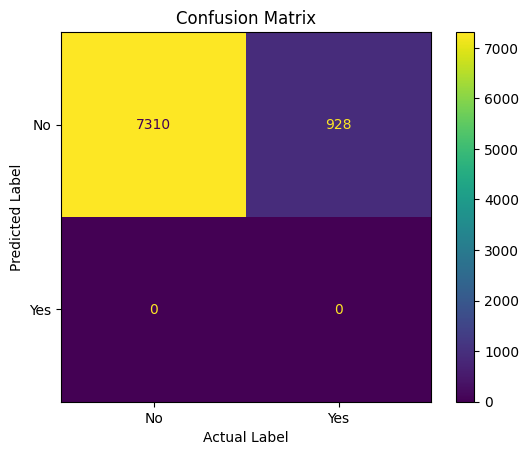

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Dummy prediction example (predicting all "no")
y_pred_dummy = np.zeros_like(y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dummy)

# Transpose the matrix to switch rows/columns
cm_flipped = cm.T

# Create a custom display with flipped axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_flipped, display_labels=["No", "Yes"])

# Plot it
disp.plot()
plt.xlabel("Actual Label")      # Since now it's on the x-axis
plt.ylabel("Predicted Label")   # Since now it's on the y-axis
plt.title("Confusion Matrix")
plt.show()


I computed accuracy, precision, and recall for my baseline model. I need to do better than this.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Dummy prediction (all 'no' = 0)
import numpy as np
y_pred_dummy = np.zeros_like(y_test)

# Accuracy: overall correct predictions
accuracy = accuracy_score(y_test, y_pred_dummy)

# Precision: of predicted 'yes', how many were correct?
precision = precision_score(y_test, y_pred_dummy, zero_division=0)

# Recall: of actual 'yes', how many were detected?
recall = recall_score(y_test, y_pred_dummy)

print(f"Baseline Accuracy: {accuracy:.4f}")
print(f"Baseline Precision: {precision:.4f}")
print(f"Baseline Recall: {recall:.4f}")


Baseline Accuracy: 0.8874
Baseline Precision: 0.0000
Baseline Recall: 0.0000


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Here, I am dropping the first category to avoid multicollinearity.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and prepare data
df = pd.read_csv("bank-additional-full.csv", sep=';')
df = df.drop(columns=['duration'])  # drop leakage feature

# Encode target
y = df['y'].map({'yes': 1, 'no': 0})
X = df.drop(columns=['y'])

# One-hot encode categorical variables (drop_first=True to prevent multicollinearity)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Create pipeline: scaling + logistic regression
lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Fit the model
lr_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = lr_pipeline.predict(X_test)




### Problem 9: Score the Model

What is the accuracy of your model?

Accuracy: 0.9011896091284293

Confusion Matrix:
 [[7217   93]
 [ 721  207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



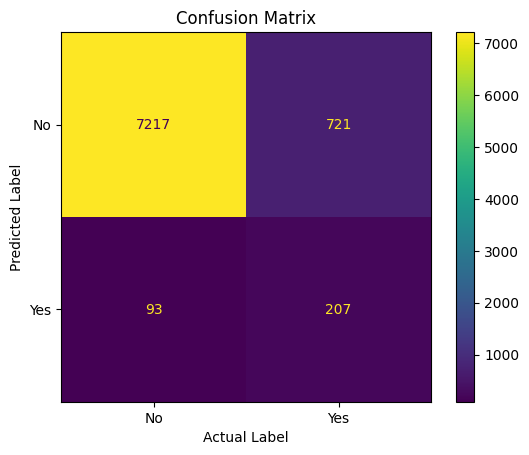

In [16]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transpose the matrix to switch rows/columns
cm_flipped = cm.T

# Create a custom display with flipped axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_flipped, display_labels=["No", "Yes"])

# Plot it
disp.plot()
plt.xlabel("Actual Label")      # Since now it's on the x-axis
plt.ylabel("Predicted Label")   # Since now it's on the y-axis
plt.title("Confusion Matrix")
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Training Time: 0.1176 seconds
Training Accuracy: 0.9116
Test Accuracy: 0.8956


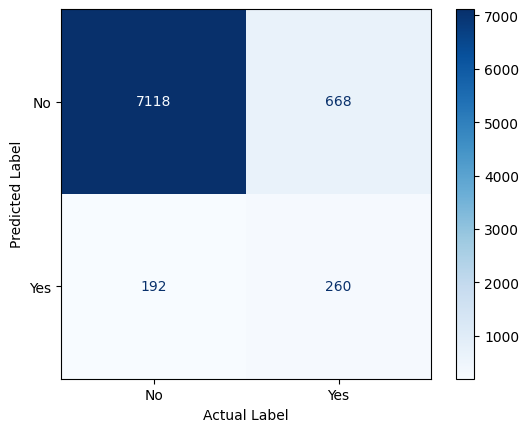

In [17]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Build pipeline: scale + KNN (default settings)
knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()  # default n_neighbors=5, metric='minkowski'
)

# Time the training process
start_time = time.time()
knn_pipeline.fit(X_train, y_train)
training_time_knn = time.time() - start_time

# Compute training accuracy
train_accuracy_knn = knn_pipeline.score(X_train, y_train)

# Compute test accuracy
test_accuracy_knn = knn_pipeline.score(X_test, y_test)

y_pred_knn = knn_pipeline.predict(X_test)

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)


# Transpose the matrix to switch rows/columns
cm_flipped = cm.T

# Create a custom display with flipped axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_flipped, display_labels=["No", "Yes"])

# Plot it
disp.plot(cmap='Blues')
plt.xlabel("Actual Label")      # Since now it's on the x-axis
plt.ylabel("Predicted Label")   # Since now it's on the y-axis
# Report results
print(f"Training Time: {training_time_knn:.4f} seconds")
print(f"Training Accuracy: {train_accuracy_knn:.4f}")
print(f"Test Accuracy: {test_accuracy_knn:.4f}")


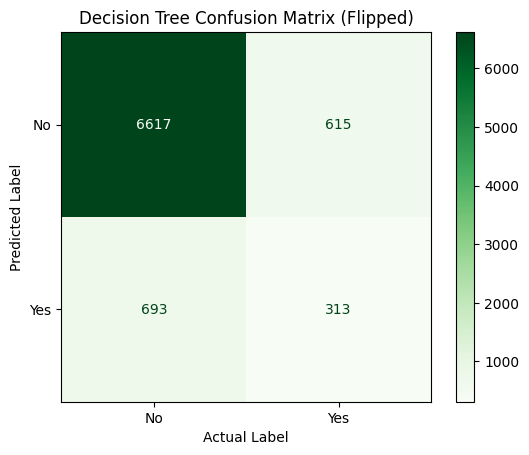

Training Time: 0.3992 seconds
Training Accuracy: 0.9954
Test Accuracy: 0.8412


In [18]:
import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling (even though trees don't require it, for consistency)
dt_pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()  # Default settings
)

# Time the training process
start_time = time.time()
dt_pipeline.fit(X_train, y_train)
training_time_dt = time.time() - start_time

# Compute accuracy
train_accuracy_dt = dt_pipeline.score(X_train, y_train)
test_accuracy_dt = dt_pipeline.score(X_test, y_test)

# Generate predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Compute flipped confusion matrix (True labels as columns, Predictions as rows)
cm = confusion_matrix(y_test, y_pred_dt).T  # Transpose to flip
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

# Display the confusion matrix with a green color scheme
disp.plot(cmap='Greens')
plt.title("Decision Tree Confusion Matrix (Flipped)")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

# Print results
print(f"Training Time: {training_time_dt:.4f} seconds")
print(f"Training Accuracy: {train_accuracy_dt:.4f}")
print(f"Test Accuracy: {test_accuracy_dt:.4f}")


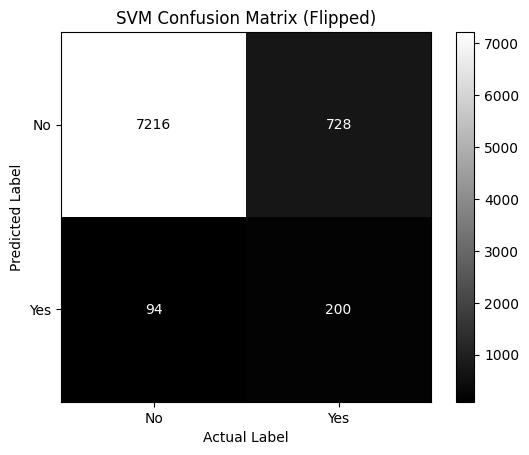

Training Time: 228.1977 seconds
Training Accuracy: 0.9092
Test Accuracy: 0.9002


In [19]:
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Build pipeline: scale + SVM (default kernel='rbf')
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC()  # default: kernel='rbf', C=1.0, gamma='scale'
)

# Time the training process
start_time = time.time()
svm_pipeline.fit(X_train, y_train)
training_time_svm = time.time() - start_time

# Compute training and test accuracy
train_accuracy_svm = svm_pipeline.score(X_train, y_train)
test_accuracy_svm = svm_pipeline.score(X_test, y_test)

# Generate predictions
y_pred_svm = svm_pipeline.predict(X_test)

# Compute flipped confusion matrix
cm = confusion_matrix(y_test, y_pred_svm).T
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

# Plot with gray color scheme
disp.plot(cmap='gray')
plt.title("SVM Confusion Matrix (Flipped)")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

# Print performance metrics
print(f"Training Time: {training_time_svm:.4f} seconds")
print(f"Training Accuracy: {train_accuracy_svm:.4f}")
print(f"Test Accuracy: {test_accuracy_svm:.4f}")


In [21]:
import pandas as pd



# Create a dictionary with the results
results = {
    "Model": ["KNN", "Decision Tree", "SVM"],
    "Training Time (s)": [training_time_knn, training_time_dt, training_time_svm],
    "Training Accuracy": [train_accuracy_knn, train_accuracy_dt, train_accuracy_svm],
    "Test Accuracy": [test_accuracy_knn, test_accuracy_dt, test_accuracy_svm]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


           Model  Training Time (s)  Training Accuracy  Test Accuracy
0            KNN           0.117555           0.911624       0.895606
1  Decision Tree           0.399244           0.995417       0.841224
2            SVM         228.197709           0.909165       0.900218


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Since the dataset already has gender removed and they stated in the article, "We recommend removing the gender feature, as exploratory analysis showed negligible difference in success rates between male and female. Including it risks unnecessary noise and potential ethical bias." that question has already been answered. To look at hyperparameter tuning, I will use GridSearchCV to optimize key hyperparameters for each model, and because I am working with an imbalanced dataset I will shift the evaluation metric from accuracy to recall, F1-score, and ROC-AUC.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score

# Define scoring dictionary
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'recall': 'recall'
}

# Grid search with multiple scoring metrics
grid_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    scoring=scoring,
    refit='f1',   # use F1 to pick the best model
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_knn.fit(X_train, y_train)

# Best model based on F1
print("Best KNN parameters (F1 optimized):", grid_knn.best_params_)

# Access other scores
print(f"Best mean cross-validated accuracy: {grid_knn.cv_results_['mean_test_accuracy'][grid_knn.best_index_]:.4f}")
print(f"Best mean cross-validated recall: {grid_knn.cv_results_['mean_test_recall'][grid_knn.best_index_]:.4f}")
print(f"Best mean cross-validated F1-score: {grid_knn.cv_results_['mean_test_f1'][grid_knn.best_index_]:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best KNN parameters (F1 optimized): {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Best mean cross-validated accuracy: 0.8885
Best mean cross-validated recall: 0.2667
Best mean cross-validated F1-score: 0.3501


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Build pipeline (scaling not required but included for consistency)
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid_dt = {
    'dt__max_depth': [None, 5, 10, 15, 20],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']
}

# Define multiple metrics and refit based on F1-score
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'recall': 'recall'
}

grid_dt = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=param_grid_dt,
    scoring=scoring,
    refit='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_dt.fit(X_train, y_train)

# Show best hyperparameters (based on F1)
print("Best Decision Tree parameters (F1 optimized):", grid_dt.best_params_)

# Show cross-validated metrics
best_idx = grid_dt.best_index_
print(f"\nBest mean CV Accuracy: {grid_dt.cv_results_['mean_test_accuracy'][best_idx]:.4f}")
print(f"Best mean CV Recall: {grid_dt.cv_results_['mean_test_recall'][best_idx]:.4f}")
print(f"Best mean CV F1-score: {grid_dt.cv_results_['mean_test_f1'][best_idx]:.4f}")

# Evaluate on test set
y_pred_dt_tuned = grid_dt.predict(X_test)
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_tuned):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_dt_tuned)}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Decision Tree parameters (F1 optimized): {'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_split': 2}

Best mean CV Accuracy: 0.8946
Best mean CV Recall: 0.2737
Best mean CV F1-score: 0.3685

Test Set Evaluation:
Accuracy: 0.8989

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7310
           1       0.60      0.30      0.40       928

    accuracy                           0.90      8238
   macro avg       0.76      0.64      0.67      8238
weighted avg       0.88      0.90      0.88      8238



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
import time

# SVM pipeline (scaling is critical)
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Parameter grid
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 0.01, 0.001],
    'svm__kernel': ['rbf']
}

# Multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'recall': 'recall'
}

# Grid search setup
grid_svm = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid_svm,
    scoring=scoring,
    refit='f1',  # Optimize based on F1
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Time training
start_time = time.time()
grid_svm.fit(X_train, y_train)
training_time_svm_tuned = time.time() - start_time

# Best hyperparameters
print("Best SVM parameters (F1 optimized):", grid_svm.best_params_)

# Best cross-validated metrics
best_idx = grid_svm.best_index_
print(f"\nBest mean CV Accuracy: {grid_svm.cv_results_['mean_test_accuracy'][best_idx]:.4f}")
print(f"Best mean CV Recall: {grid_svm.cv_results_['mean_test_recall'][best_idx]:.4f}")
print(f"Best mean CV F1-score: {grid_svm.cv_results_['mean_test_f1'][best_idx]:.4f}")

# Evaluate on test set
y_pred_svm_tuned = grid_svm.predict(X_test)
test_accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
test_recall_svm_tuned = recall_score(y_test, y_pred_svm_tuned)
test_f1_svm_tuned = f1_score(y_test, y_pred_svm_tuned)

print("\nTest Set Evaluation:")
print(f"Test Accuracy: {test_accuracy_svm_tuned:.4f}")
print(f"Test Recall: {test_recall_svm_tuned:.4f}")
print(f"Test F1-score: {test_f1_svm_tuned:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_tuned))


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


##### Questions